 ### ![alt text](../mini_logo.png "Title") Notebook - Demo exoSpin package - TEST VERSION


#### **1 - Imports**


In [1]:
# Imports

import sys

# Give the path to ForMoSA to be able to import it. No need when this will be a pip package
base_path = '../exoSpin' 
sys.path.append(base_path)

import numpy as np
import matplotlib as plt
from obliquity import *

#### **2 - Inputs**

The main function of the exoSpin package is <font color='#3498DB'>**obliquity()**</font>.

It takes as inputs path files for all parameters with a lot of data as the orbital inclination, 
the radius, etc.. or values as the period or the mass of the exoplanet.

For more details, go to the obliquity documentation.

In [2]:
# File paths & values for AB Pic b.

n = 10000 # Number of samples wanted to generate a normal distribution from only mean value and standard deviation. 

exoplanet_name = 'AB Pic b'
io = 'data/io_2024.dat'
radius = 'data/rp_vrot.txt'
vsini = 'data/rp_vrot.txt'
omega = [-5,4,n]
P = 2.1
M = 10

#### **3 - Obliquity()**

The only thing you have to do is just calling the function <font color='#3498DB'>**obliquity()**</font> with all the inputs

After the calling of the function, an input user will be command: **Which method of computing do you want? (easy/complex)**

You just have to choose between easy or complex.

At the end you will get a nice plot of the planet's obliquity.


Initializing ExoSpin ...

-> ExoSpin Configuration

-> ExoSpin Computing

Complex method computing ...

-> ExoSpin Plot

Plot - Obliquity of AB Pic b


<Figure size 640x480 with 0 Axes>

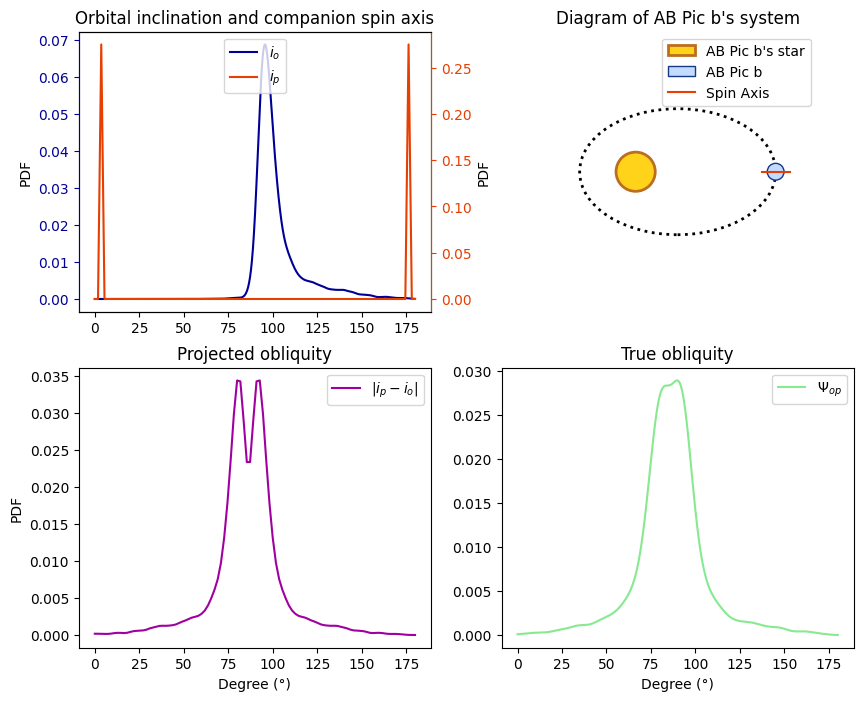

In [3]:
x = obliquity(exoplanet_name,io,radius,vsini,omega,P,M)

#### **4 - Exoplanet object**

The variable **x** is now an Exoplanet object, so from that you can get interesting informations from it.

**a) Inputs data**

In [4]:
orbital_inclination_data = x.io
print('The data for the orbital inclination are:\n',orbital_inclination_data)

The data for the orbital inclination are:
 [ 99.78320816 126.56526403  95.10140061 ...  95.59170484  95.36304495
 101.21719517]


In [5]:
exoplanet_name = x.planet_name
print('The planet name is',exoplanet_name)

The planet name is AB Pic b


In [6]:
mass = x.mass
print('The mass of ' + exoplanet_name + ' is',mass)

The mass of AB Pic b is 10.0 jupiterMass


**b) Computed data**

In [7]:
spin_axis_data = x.ip
print('The data for the spin axis of ' + exoplanet_name + ' are: \n', spin_axis_data)

The data for the spin axis of AB Pic b are: 
 [  2.38352082   2.36922174   2.50312529 ... 177.59898062 177.59969952
 177.5941293 ]


In [8]:
true_obliquity_data = x.true_obli
print('The data for the true obliquity of ' + exoplanet_name + ' are: \n',true_obliquity_data)

The data for the true obliquity of AB Pic b are: 
 [ 97.85898324 126.4057941   93.94380241 ...  85.74506971  86.89080759
  77.14821723]


#### **5 - Plot class**

The variable **x** is an Exoplanet object, but it can also be mixed with a **Plot** class. 

Indeed from Exoplanet class method like <font color='purple'>**self.hist()**</font> or <font color='purple'>**self.pdf()**</font>, you can compute and plot histogram or PDF (Probabilty Density Function) of exoplanet's parameters.

After that using <font color='purple'>**self.plot()**</font> will plot the computed data.

**a) Histogram plot**

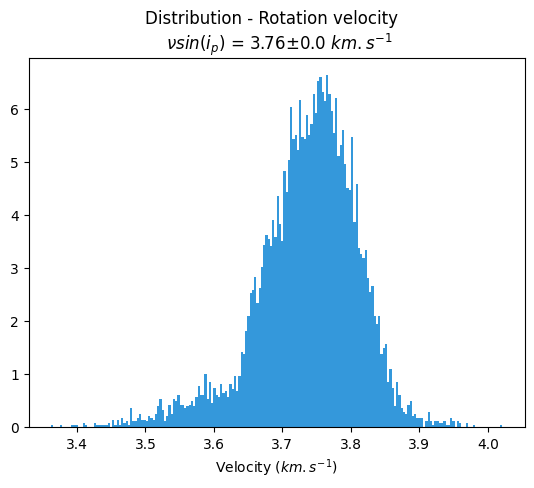

In [9]:
x.hist('Rotational velocity','#3498DB').plot()

**b) PDF plot**

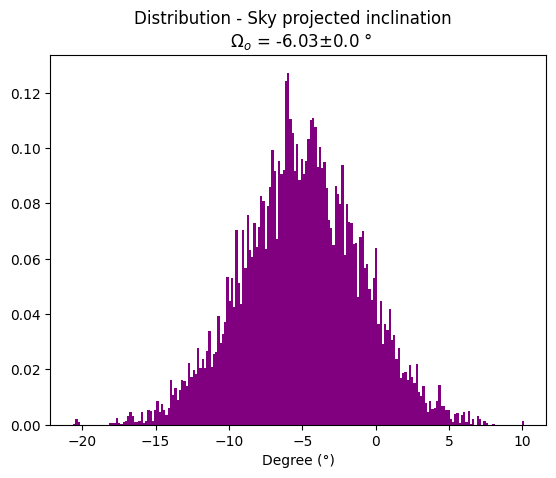

In [10]:
x.hist('Sky projected inclination','purple').plot()

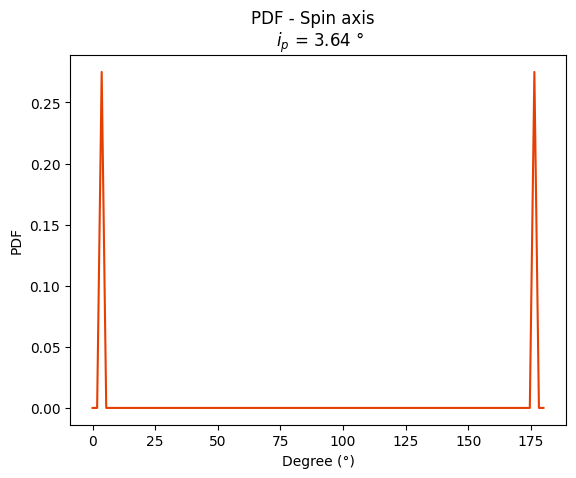

In [11]:
ip_pdf = x.ip_pdf_saved
ip_pdf.plot()

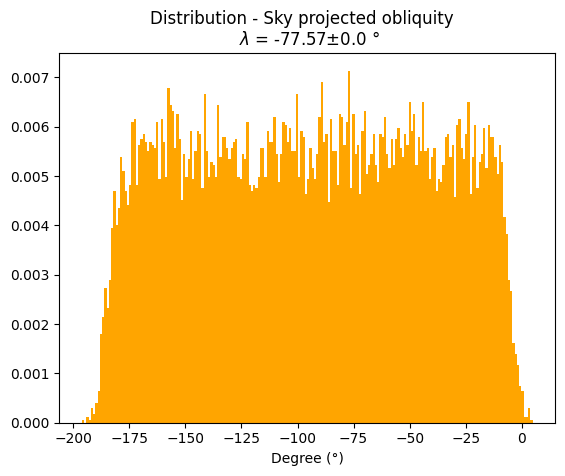

In [12]:
x.hist('Sky projected obliquity','orange').plot()

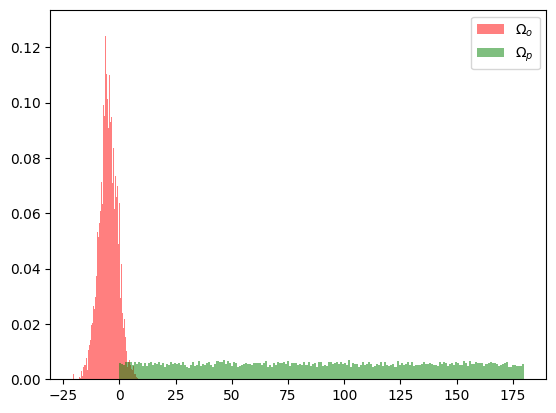

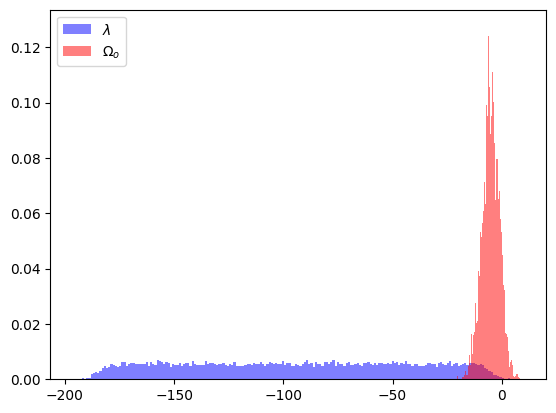

In [13]:

lambda_hist = x.hist('Sky projected obliquity')
o_hist = x.hist('Sky projected inclination')
p_hist = x.hist('Sky projected spin axis')

bins = lambda_hist.bins

plt.figure(1)
y1, x1, _ = plt.hist(o_hist.x, bins=bins,density=True,color='red',label='$\Omega_o$',alpha=0.5)
y1, x1, _ = plt.hist(p_hist.x, bins=bins,density=True,color='green',label='$\Omega_p$',alpha=0.5)
plt.legend()

plt.figure(2)
y1, x1, _ = plt.hist(lambda_hist.x, bins=bins,density=True,color='blue',label='$\lambda$',alpha=0.5)
y1, x1, _ = plt.hist(o_hist.x, bins=bins,density=True,color='red',label='$\Omega_o$',alpha=0.5)
plt.legend()


In [14]:
from matplotlib.lines import Line2D

ip_pdf = x.ip_pdf_saved
x_a = ip_pdf.x[:60]
y_a = ip_pdf.y[:60]

mean_ip = np.trapz(x_a*y_a, x_a)
var_ip = np.sqrt(np.trapz((x_a-mean_ip)**2 * y_a, x_a))
print('moyenne i_p = ', mean_ip)
print('ecart type i_p = ', var_ip)
print(ip_pdf.x.size)
print(ip_pdf.x)

io_pdf = x.pdf('Orbital inclination')
mean_io = np.trapz(io_pdf.x * io_pdf.y, io_pdf.x)
var_io = np.sqrt(np.trapz((io_pdf.x-mean_io)**2 * io_pdf.y, io_pdf.x))
print('moyenne i_o = ', mean_io)
print('ecart type i_o = ',var_io)
print(io_pdf.x.size)

pro_pdf = x.pdf('Projected obliquity - complex')
mean_pro = np.trapz(pro_pdf.x * pro_pdf.y, pro_pdf.x)
var_pro = np.sqrt(np.trapz((pro_pdf.x-mean_pro)**2 * pro_pdf.y, pro_pdf.x))
print('moyenne Psi_pro = ',mean_pro)
print('ecart type Psi_pro = ', var_pro)
print(pro_pdf.x.size)

io_file = open('data/io.dat', "r")
io_samp_new = np.loadtxt(io_file, skiprows=1)
io_samp_new = np.rad2deg(io_samp_new)

angles_new = np.linspace(0,180,1000)
io_new_kde = gaussian_kde(io_samp_new,bw_method='scott')
io_new_pdf = io_new_kde(angles_new)
#ax2.errorbar(90, io_pdf.y[500]*0.1, xerr=var_io, yerr=0, fmt='D', color='red', capsize=5)

mean_io_new = np.trapz(angles_new * io_new_pdf, angles_new)
var_io_new = np.sqrt(np.trapz((angles_new-mean_io_new)**2 * io_new_pdf, angles_new))
print('moyenne ancien i_p = ',mean_io_new)
print('ecart type ancien i_p = ', var_io)


#ax2.legend([legend_element, legend_element2],
#           ['Updated posteriors', 'P.Palma-Bifani et al. 2023'], loc='best')




moyenne i_p =  1.818181818181822
ecart type i_p =  1.2856486930664488
100
[  0.           1.81818182   3.63636364   5.45454545   7.27272727
   9.09090909  10.90909091  12.72727273  14.54545455  16.36363636
  18.18181818  20.          21.81818182  23.63636364  25.45454545
  27.27272727  29.09090909  30.90909091  32.72727273  34.54545455
  36.36363636  38.18181818  40.          41.81818182  43.63636364
  45.45454545  47.27272727  49.09090909  50.90909091  52.72727273
  54.54545455  56.36363636  58.18181818  60.          61.81818182
  63.63636364  65.45454545  67.27272727  69.09090909  70.90909091
  72.72727273  74.54545455  76.36363636  78.18181818  80.
  81.81818182  83.63636364  85.45454545  87.27272727  89.09090909
  90.90909091  92.72727273  94.54545455  96.36363636  98.18181818
 100.         101.81818182 103.63636364 105.45454545 107.27272727
 109.09090909 110.90909091 112.72727273 114.54545455 116.36363636
 118.18181818 120.         121.81818182 123.63636364 125.45454545
 127.27272

moyenne i_o =  102.34876084895927
ecart type i_o =  13.71025980479885
1000
moyenne Psi_pro =  86.3641836423898
ecart type Psi_pro =  18.457190070095194
100
moyenne ancien i_p =  90.38143293327019
ecart type ancien i_p =  13.71025980479885


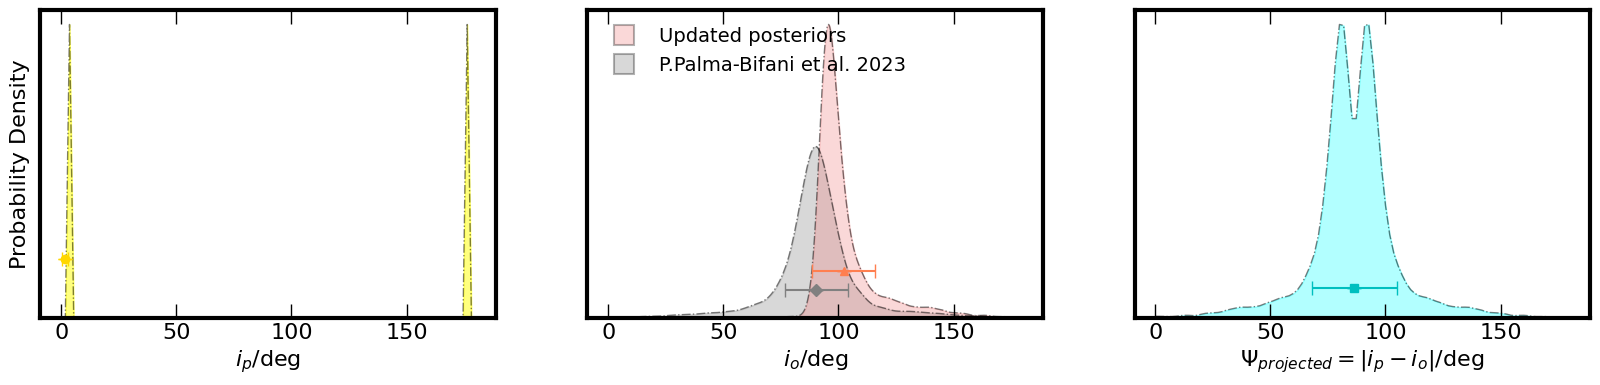

In [15]:
plt.rcParams.update({"font.size": 16})
legend_element = Line2D([0], [0], color='black', linestyle='None',
                        marker='s', markersize=15, markerfacecolor='lightcoral',
                        markeredgewidth=1.5, markeredgecolor='black',alpha=0.3)

legend_element2 = Line2D([0], [0], color='black', linestyle='None',
                        marker='s', markersize=15, markerfacecolor='grey',
                        markeredgewidth=1.5, markeredgecolor='black',alpha=0.3)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,4))


ax1.plot(ip_pdf.x,ip_pdf.y, color='black', alpha=0.5, linewidth=1,linestyle="dashdot")
ax1.fill_between(ip_pdf.x,ip_pdf.y, color='yellow', alpha=0.5)
for spine in ax1.spines.values():
    spine.set_linewidth(3)
ax1.tick_params(axis='x', which='both', direction='in', length=10, width=1, top=True)
ax1.tick_params(axis='y', which='both', direction='in', length=0, width=1)
ax1.set_xlabel('$i_p$/deg', fontsize=16)
ax1.set_ylabel('Probability Density')
ax1.set_yticklabels([])
ax1.set_ylim(bottom=0)
ax1.errorbar(mean_ip, ip_pdf.y[2]*0.2, xerr=var_ip, yerr=0, fmt='o', color='gold', capsize=5)

ax2.plot(angles_new,io_new_pdf, color='black', alpha=0.5, linewidth=1,linestyle="dashdot")
ax2.fill_between(angles_new, io_new_pdf, color='grey', alpha=0.3)

ax2.plot(io_pdf.x,io_pdf.y, color='black', alpha=0.5, linewidth=1,linestyle="dashdot")
ax2.fill_between(io_pdf.x,io_pdf.y, color='lightcoral', alpha=0.3)
for spine in ax2.spines.values():
    spine.set_linewidth(3)
ax2.tick_params(axis='x', which='both', direction='in', length=10, width=1, top=True)
ax2.tick_params(axis='y', which='both', direction='in', length=0, width=1)
ax2.set_yticklabels([])
ax2.set_ylim(bottom=0)
ax2.set_xlabel('$i_o$/deg', fontsize=16)
ax2.errorbar(mean_io, io_pdf.y[569]*0.35, xerr=var_io, yerr=0, fmt='^', color='coral', capsize=5)
ax2.errorbar(mean_io_new, io_new_pdf[500]*0.16, xerr=var_io, yerr=0, fmt='D', color='grey', capsize=5)
ax2.legend([legend_element, legend_element2],
           ['Updated posteriors', 'P.Palma-Bifani et al. 2023'], loc='upper left', frameon=False,fontsize=14)

ax3.plot(pro_pdf.x,pro_pdf.y, color='black', alpha=0.5, linewidth=1,linestyle="dashdot")
ax3.fill_between(pro_pdf.x,pro_pdf.y, color='cyan', alpha=0.3)
for spine in ax3.spines.values():
    spine.set_linewidth(3)
ax3.tick_params(axis='x', which='both', direction='in', length=10, width=1, top=True)
ax3.tick_params(axis='y', which='both', direction='in', length=0, width=1)
ax3.set_yticklabels([])
ax3.set_ylim(bottom=0)
ax3.set_xlabel('$\Psi_{projected}=|i_p - i_o|$/deg', fontsize=16)
ax3.errorbar(mean_pro, pro_pdf.y[48]*0.15, xerr=var_pro, yerr=0, fmt='s', color='c', capsize=5)

plt.show()
fig.savefig('ab_pic_plot.pdf', format='pdf',bbox_inches='tight')




In [16]:
print('ip = ' + str(mean_ip) + ' +- ' + str(var_ip))
print('io_old = ' + str(mean_io_new) + ' +- ' + str(var_io_new))
print('io_new = ' + str(mean_io) + ' +- ' + str(var_io))
print('Psi_proj = ' + str(mean_pro) + ' +- ' + str(var_pro))

ip = 1.818181818181822 +- 1.2856486930664488
io_old = 90.38143293327019 +- 18.2032458657109
io_new = 102.34876084895927 +- 13.71025980479885
Psi_proj = 86.3641836423898 +- 18.457190070095194


In [17]:
mean_io_new = np.trapz(angles_new * io_new_pdf, angles_new)
var_io_new = np.sqrt(np.trapz((angles_new-mean_io_new)**2 * io_new_pdf, angles_new))
print(mean_io_new)
print(var_io)
print(angles_new[569])

90.38143293327019
13.71025980479885
102.52252252252252


In [18]:
legend_element = Line2D([0], [0], color='black', linestyle='None',
                        marker='s', markersize=15, markerfacecolor='lightcoral',
                        markeredgewidth=1.5, markeredgecolor='black',alpha=0.5)

legend_element2 = Line2D([0], [0], color='black', linestyle='None',
                        marker='s', markersize=15, markerfacecolor='grey',
                        markeredgewidth=1.5, markeredgecolor='black',alpha=0.5)

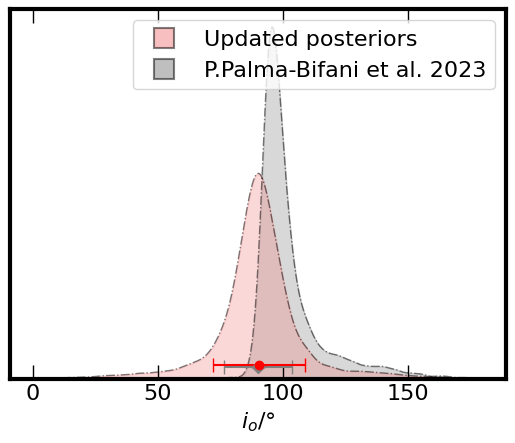

In [19]:
fig, ax2 = plt.subplots()

ax2.plot(io_pdf.x,io_pdf.y, color='black', alpha=0.5, linewidth=1,linestyle="dashdot",label='P.Palma-Bifani et al.2023')
ax2.fill_between(io_pdf.x,io_pdf.y, color='grey', alpha=0.3)

ax2.plot(angles_new,io_new_pdf, color='black', alpha=0.5, linewidth=1,linestyle="dashdot",label='Updated posteriors')
ax2.fill_between(angles_new, io_new_pdf, color='lightcoral', alpha=0.3)

for spine in ax2.spines.values():
    spine.set_linewidth(3)
ax2.tick_params(axis='x', which='both', direction='in', length=10, width=1, top=True)
ax2.tick_params(axis='y', which='both', direction='in', length=0, width=1)
ax2.set_yticklabels([])
ax2.set_ylim(bottom=0)
ax2.set_xlabel('$i_o$/°', fontsize=16)
ax2.errorbar(90, io_pdf.y[500]*0.1, xerr=var_io, yerr=0, fmt='D', color='grey', capsize=5)
ax2.errorbar(mean_io_new, io_new_pdf[569]*0.2, xerr=var_io_new, yerr=0, fmt='o', color='red', capsize=5)
ax2.legend([legend_element, legend_element2],
           ['Updated posteriors', 'P.Palma-Bifani et al. 2023'], loc='best')

In [20]:
radius = np.random.normal(loc=1.87, scale=0.1, size=x.vsini.size) * u.Rjup
v = 2*np.pi*radius/x.period

v = v.to(u.km/u.s)



# y_, x_, _ = plt.hist(v.value, alpha=0.5,bins=200,density=True) 
cos_k = 0.1

cos_p = 0.9989
vsin_kde = kde(x.vsini)

plt.figure()
plt.plot(v_range, vsin_kde(v_range*np.sqrt(1-cos_k*cos_k)),label='vsini min_lim',color='red',alpha=0.4)
plt.plot(v_range, vsin_kde(v_range*np.sqrt(1-cos_p*cos_p)),label='vsini max_lim',color='blue',alpha=0.4)
plt.plot(v_range,v_pdf,label='v',color='green',alpha=0.4)
v_kde = gaussian_kde(v,bw_method='scott')
v_pdf = v_kde(v_range)



NameError: name 'v_range' is not defined

<Figure size 640x480 with 0 Axes>

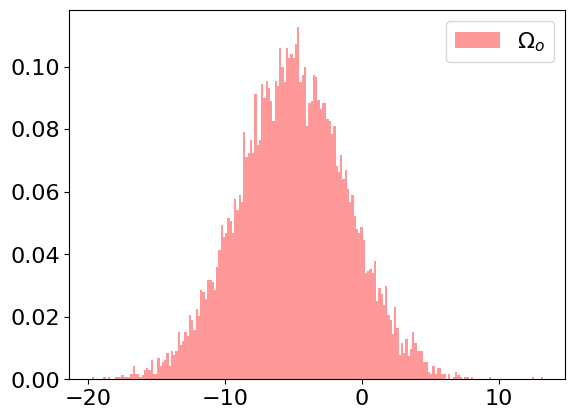

In [ ]:
i = x.hist('Orbital inclination').x
omega_o = np.random.normal(loc=-5, scale=4, size=10000)
bins = 200
plt.figure(1)
y1, x1, _ = plt.hist(omega_o, bins=bins,density=True,color='red',label='$\Omega_o$',alpha=0.4)
#y1, x1, _ = plt.hist(i, bins=bins,density=True,color='green',label='$\i_o$',alpha=0.4)
plt.legend()

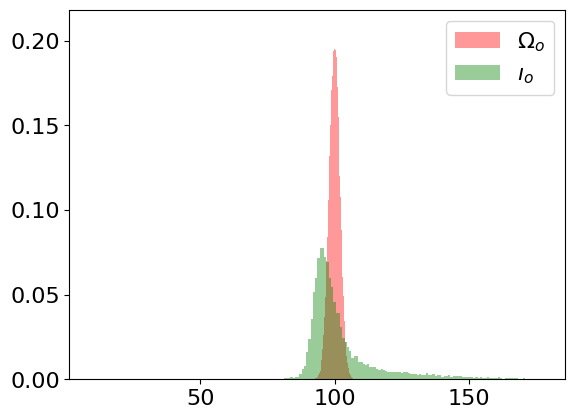

In [ ]:
n = 100
a = np.random.normal(loc=100, scale=2, size=n)
bins = 200
plt.figure(1)
y1, x1, _ = plt.hist(omega_o, bins=bins,density=True,color='red',label='$\Omega_o$',alpha=0.4)
y1, x1, _ = plt.hist(i, bins=bins,density=True,color='green',label='$\i_o$',alpha=0.4)
plt.legend()